# Code du projet

In [1]:
# Importations

import random
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import copy

### Question 3

In [2]:
def trianglePascal(n):
    T = [[0] * (n+1) for p in range(n+1)]
    for n in range(n+1):
        if n == 0:
            T[n][0] = 1
        else:
            for k in range(n+1):
                if k == 0:
                    T[n][0] = 1
                else:
                    T[n][k] = T[n-1][k-1] + T[n-1][k]
    return T



def pricer_1(N,rN,hN,bN,s,f):
    qN = (rN-bN)/(hN-bN)
    T = trianglePascal(N)
    somme = 0
    for k in range(0,N+1):
        binome = T[N][k]
        nouveauF = f(s*((1+hN)**k)*((1+bN)**(N-k)))
        somme += nouveauF*binome*(qN**k)*((1-qN)**(N-k))
    return (1/((1+rN)**N))*somme

### Question 4

In [3]:
def f1(x):
    return max(x - 110,0)

pricer = pricer_1(20,0.02,0.05,-0.05,100,f1)

print("Prix : ",pricer)

Prix :  26.61694136025856


### Question 5

In [4]:
def pricer_2(N,rN,hN,bN,s,f):
    qN = (rN-bN)/(hN-bN)
    # Initialisation des f(x) à la fin de l'arbre
    tree = [[f(s*((1+bN)**k)*((1+hN)**(N-k))) for k in range(0,N+1)]]
    for n in range(N,0,-1):
        aux = []
        for i in range(0,n):
            fup = tree[-1][i]
            fdown = tree[-1][i+1]
            vn = (1/(1+rN))*(qN*fup+(1-qN)*fdown)
            aux.append(vn)
        tree.append(aux)
    return tree

### Question 6

In [5]:
def f2(x):
    return max(x - 100,0)

arbre = pricer_2(3,0.02,0.05,-0.05,100,f2)
print("Prix : ", arbre[-1][0])
print("Voici l'arbre :",arbre)

Prix :  7.063436197239379
Voici l'arbre : [[15.762500000000017, 4.737499999999997, 0, 0], [12.210784313725503, 3.251225490196077, 0.0], [9.336192810457526, 2.2312331795463276], [7.063436197239379]]


### Question 7

In [6]:
randomN = random.randint(5, 15)
s = 100
rN = 0.01
hN = 0.05
bN = -0.05

tree = pricer_2(randomN,rN,hN,bN,s,f1)

pricerRandom1 = pricer_1(randomN,rN,hN,bN,s,f1) 
pricerRandom2 = tree[-1][0]

print("On a N = ",randomN)
print("pricer 1 avec N random :", pricerRandom1)
print("pricer 2 avec N random :", pricerRandom2)

On a N =  15
pricer 1 avec N random : 10.381973548376116
pricer 2 avec N random : 10.381973548376118


### Question 10

In [7]:
def beta(x,hN,bN,vku,vkd,rN,k):
    num = vkd*(1+hN)-vku*(1+bN)
    den = (hN-bN)*((1+rN)**k)
    return num/den

def alpha(x,hN,bN,vku,vkd,rN,k):
    num = vku-beta(x,hN,bN,vku,vkd,rN,k)*((1+rN)**k)
    den = x*(1+hN)
    return num/den

In [8]:
def couverture(N,s,rN,hN,bN,f):
    tabVk = pricer_2(N, rN, hN, bN, s, f)
    tabVk.reverse()
    a = alpha(s,hN,bN,tabVk[1][0],tabVk[1][1],rN,1)
    b = beta(s,hN,bN,tabVk[1][0],tabVk[1][1],rN,1)
    tree = [[(s,a,b)]]
    for i in range(1,N):
        aux = []
        for j in range(len(tree[-1])):
            x,aa,bb = tree[-1][j]
            vku1 = tabVk[i+1][j]
            vkd1 = tabVk[i+1][j+1]
            vku2 = tabVk[i+1][j+1]
            vkd2 = tabVk[i+1][j+2]
            xup = x*(1+hN)
            xdown = x*(1+bN)
            aup = alpha(xup,hN,bN,vku1,vkd1,rN,i+1)
            bup = beta(xup,hN,bN,vku1,vkd1,rN,i+1)
            adown = alpha(xdown,hN,bN,vku2,vkd2,rN,i+1)
            bdown = beta(xdown,hN,bN,vku2,vkd2,rN,i+1)
            aux.append((xup,aup,bup))
            aux.append((xdown,adown,bdown))
        tree.append(aux)
    return tree

In [9]:
def f(x):
    return max(x-100,0)

arbre = couverture(2, 100, 0.03, 0.05, -0.05, f)
print(arbre)
#Resultat sous la forme d'une liste de (x,alpha,beta) 

[[(100, 0.7961165048543688, -73.42822132151944)], [(105.0, 0.976190476190476, -91.78527665189932), (95.0, 0.0, 0.0)]]


### Question 12

In [10]:
def pricer_MC(n,s,r,sigma,T,f):
    normale = stats.norm.rvs(0,1,n)
    somme = 0
    c1 = (r-((sigma**2)/2))*T
    c2 = math.exp(-r*T)
    for i in range(n):
        Bi = math.sqrt(T)*normale[i]
        somme += c2*f(s*math.exp(c1+sigma*Bi))
    return somme/n

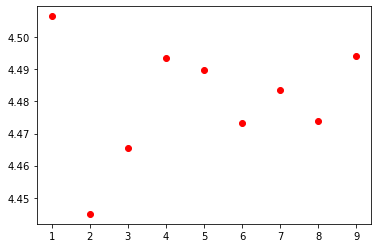

In [11]:
listeK = [i for i in range(1,10)]
listePrix = [pricer_MC(el*(10**5),100,0.01,0.1,1,f) for el in listeK]
plt.plot(listeK, listePrix, 'ro')
plt.show()

### Question 15

In [12]:
def put_BS(s,r,sig,T,K):
    d1 = (1/(sig*math.sqrt(T)))*(math.log(s/K)+(r+(sig**2)/2)*T)
    d2 =  d1 - sig*math.sqrt(T)
    F1 = stats.norm.cdf(-d1,0,1)
    F2 = stats.norm.cdf(-d2,0,1)
    return -s*F1+K*math.exp(-r*T)*F2

### Question 16

In [13]:
print(put_BS(100, 0.01, 0.1, 1, 90))

0.5815000751362422


### Question 17

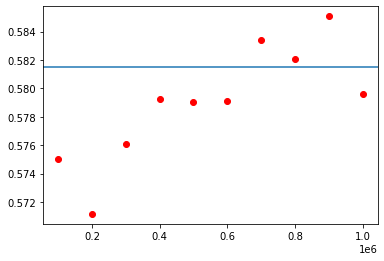

In [14]:
listeAbs = [k*(10**5) for k in range(1,11)]

def f(x):
    return max(90-x,0)

listeOrd = [pricer_MC(el,100,0.01,0.1,1,f) for el in listeAbs]

plt.plot(listeAbs,listeOrd,'ro')
plt.axhline(y=put_BS(100,0.01,0.1,1,90))
plt.show()

### Question 18

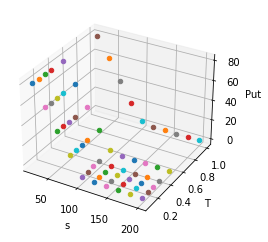

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

T = [1/12,1/6,1/4,1/3,1/2,1]
s = [20*k for k in range(1,11)]

for si in s:
    for Ti in T:
        ax.scatter(si, Ti, put_BS(si,0.01,0.1,Ti,100))

ax.set_xlabel('s')
ax.set_ylabel('T')
ax.set_zlabel('Put')
#Ligne a décommenter pour changer les points de vues :
#ax.view_init(elev=0., azim=0)
#ax.view_init(elev=0., azim=90)
plt.show()

### Question 19

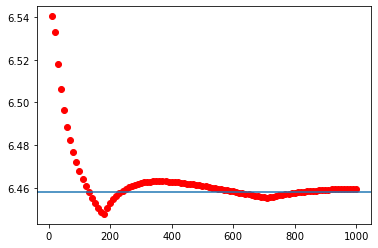

In [16]:
def fst(st):
    return max(100-st,0)

def listeP2(fst,s,sig,r,T):
    res = []
    for k in range(1,101):
        N = 10*k
        rN = (r*T)/N
        hN = (1+rN)*math.exp(sig*math.sqrt(T/N))-1
        bN = (1+rN)*math.exp(-sig*math.sqrt(T/N))-1
        res.append(pricer_2(N,rN,hN,bN,s,fst)[-1][0])
    return res

listeN = [10*k for k in range(1,101)]
listePricer2 = listeP2(fst,100,0.2,0.03,1)

plt.plot(listeN, listePricer2, 'ro')
plt.axhline(y=put_BS(100,0.03,0.2,1,100))
plt.show()

### Question 20

##### Euler Explicite

In [17]:
def euler_exp(K,r,sig,T,x_min,x_max,N,M):
    delta_t = T/M
    liste_t = [m*delta_t for m in range(0,M+1)]
    h = (x_max - x_min)/N
    liste_x = [x_min+j*h for j in range(0,N+1)]
    matrice_res = [[0 for _ in range(N+1)] for _ in range(M+1)]
    for i in range(N+1):
        matrice_res[0][i] = max(K - math.exp(liste_x[i]),0)
    for i in range(M+1):
        matrice_res[i][0] = K*math.exp(-r*liste_t[i])-math.exp(x_min)
    
    for i in range(1,M+1):
        for j in range(1,N):
            matrice_res[i][j] = matrice_res[i-1][j] \
            +delta_t*0.5*(sig**2)*(1/(h**2))*(matrice_res[i-1][j+1] \
            -2*matrice_res[i-1][j]+matrice_res[i-1][j-1]) \
            +delta_t*(r-(sig**2)/2)*(1/(2*h))*(matrice_res[i-1][j+1] \
            -matrice_res[i-1][j-1])-delta_t*r*matrice_res[i-1][j]
    return matrice_res[-1]

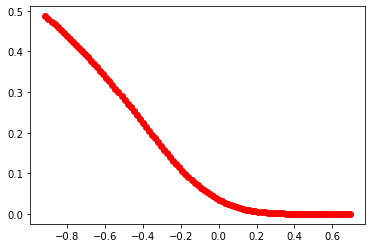

In [18]:
listeP = euler_exp(0.9,0.015,0.21,1,math.log(0.4),math.log(2),100,200)

x_max = math.log(2)
x_min = math.log(0.4)
N = 100
h = (x_max - x_min)/N
liste_x = [x_min+j*h for j in range(0,N+1)]
plt.plot(liste_x, listeP, 'ro')
plt.show()

##### Euleur Implicite 

In [19]:
def euler_imp(K,r,sig,T,x_min,x_max,N,M):
    delta_t = T/M
    liste_t = [m*delta_t for m in range(0,M+1)]
    h = (x_max - x_min)/N
    liste_x = [x_min+j*h for j in range(0,N+1)]
    Pm = [ max(K - math.exp(liste_x[i]),0) for i in range(0,N+1)]
    a = - (delta_t * (sig**2))/(2*(h**2)) + ((delta_t)*r)/(2*h) - (delta_t*(sig)**2)/(4*h)
    b = r*delta_t + delta_t*(sig**2)*(1/(h**2)) + 1
    c = - (delta_t/2) * (sig/h)**2 - (delta_t *r)/(2*h) + (delta_t*(sig)**2)/(4*h)
    A = [[0 for _ in range(N+1)] for _ in range(N+1)]
    for j in range(1,N):
        A[j][j-1] = a
        A[j][j] = b
        A[j][j+1] = c
    # 1er ligne et dernière useless mais la matrice doit être inversible
    A[N][N] = 1

    for j in range(1,M+1):
        # On calcule les nouveaux Pm M fois
        A[0][0] = (K*np.exp(-r*liste_t[j-1])-np.exp(x_min))/(K*np.exp(-r*liste_t[j])-np.exp(x_min))
        Pm = np.linalg.solve(A,Pm)
        Pm[0] = K*math.exp(-r*liste_t[j])-math.exp(x_min)
        Pm[-1] = 0
    return Pm

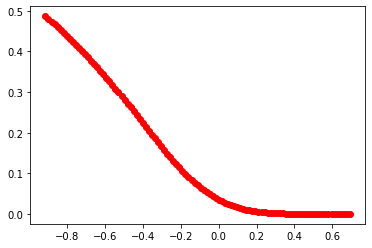

In [20]:
listeP = euler_imp(0.9,0.015,0.21,1,math.log(0.4),math.log(2),100,200)

x_max = math.log(2)
x_min = math.log(0.4)
N = 100
h = (x_max - x_min)/N
liste_x = [x_min+j*h for j in range(0,N+1)]
plt.plot(liste_x, listeP, 'ro')
plt.show()


###### Crank-Nicholson

In [21]:
def CosM(K,r,sig,T,x_min,x_max,N,M):     
    delta_t = T/M
    liste_t = [m*delta_t for m in range(0,M+1)]
    h = (x_max - x_min)/N
    liste_x = [x_min+j*h for j in range(0,N+1)]
    Pm = np.array([ max(K - math.exp(liste_x[i]),0) for i in range(0,N+1)])
    a = (sig**2)/(4*(h**2))-(r-(sig**2)/2)*(1/(4*h))
    b = (1/delta_t)-(sig**2)/(2*h**2)-r
    c = (sig**2)/(4*h**2)+(r-(sig**2)/2)*(1/(4*h))
    ap = -(sig**2)/(4*h**2)+(r-(sig**2)/2)*(1/(4*h))
    bp = (1/delta_t)+(sig**2)/(2*h**2)
    cp = -(sig**2)/(4*h**2)-(r-(sig**2)/2)*(1/(4*h))
    AP = np.array([[0 for _ in range(N+1)] for _ in range(N+1)])
    for j in range(1,N):
        AP[j][j-1] = ap
        AP[j][j] = bp
        AP[j][j+1] = cp
    AP[N][N] = 1
    AP[0][0] = 1
    for j in range(1,M+1):
        nPm = copy.deepcopy(Pm)
        nPm[0] = K*math.exp(-r*liste_t[j])-math.exp(x_min)
        nPm[-1] = 0
        for i in range(1,N):
            nPm[i] = a*Pm[i-1]+b*Pm[i]+c*Pm[i+1]
        Pm = np.linalg.solve(AP,nPm)
        Pm[0] = K*math.exp(-r*liste_t[j])-math.exp(x_min)
        Pm[-1] = 0
    return Pm 

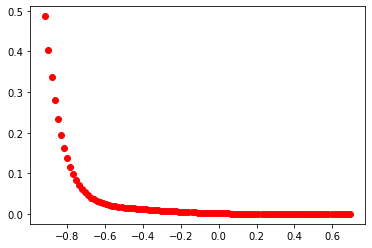

In [22]:
listeP = CosM(0.9,0.015,0.21,1,math.log(0.4),math.log(2),100,200)

x_max = math.log(2)
x_min = math.log(0.4)
N = 100
h = (x_max - x_min)/N
liste_x = [x_min+j*h for j in range(0,N+1)]
plt.plot(liste_x, listeP, 'ro')
plt.show()